**Chapter 4 – Training Models**

<table align="left">
  <td>
    <a href="https://colab.research.google.com/github/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>
  </td>
  <td>
    <a target="_blank" href="https://kaggle.com/kernels/welcome?src=https://github.com/ageron/handson-ml3/blob/main/04_training_linear_models.ipynb"><img src="https://kaggle.com/static/images/open-in-kaggle.svg" /></a>
  </td>
</table>

## Stochastic Gradient Descent

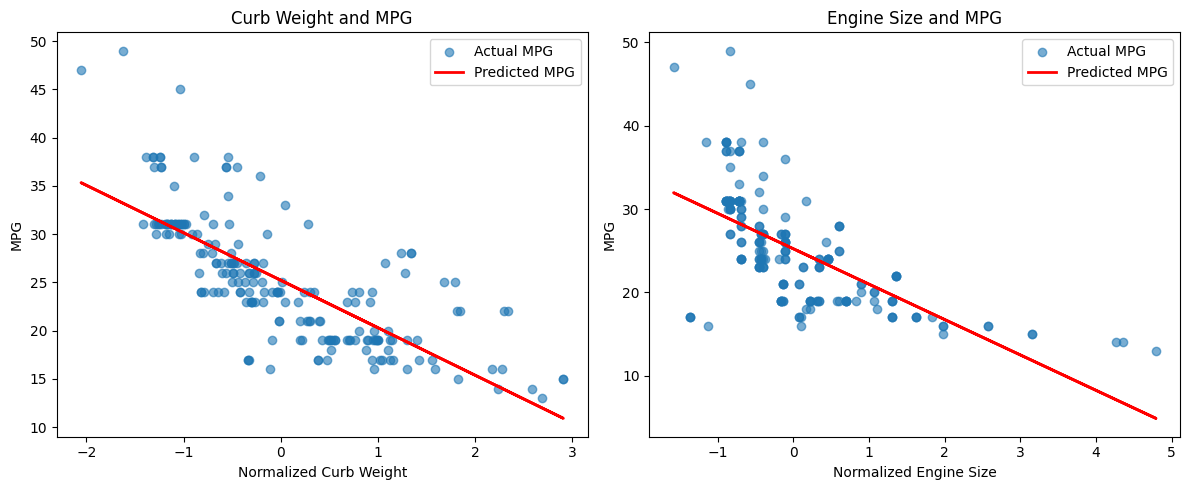

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

# Dataset
dataset_url = "https://raw.githubusercontent.com/plotly/datasets/master/imports-85.csv"
df = pd.read_csv(dataset_url)

curb_weight = df[['curb-weight']].values
engine_size = df[['engine-size']].values
mpg = df[['city-mpg']].values

scaler = StandardScaler()
curb_weight_scaled = scaler.fit_transform(curb_weight)
engine_size_scaled = scaler.fit_transform(engine_size)

def ridge_regression(X, y, alpha):
    model = Ridge(alpha=alpha)
    model.fit(X, y)
    y_pred = model.predict(X)
    return y_pred, model.coef_

# L2 regularization for curb weight
mpg_pred_curb_weight, coef_curb_weight = ridge_regression(curb_weight_scaled, mpg, alpha=1.0)

# L2 regularization for engine size
mpg_pred_engine_size, coef_engine_size = ridge_regression(engine_size_scaled, mpg, alpha=1.0)

plt.figure(figsize=(12, 5))


plt.subplot(1, 2, 1)
plt.scatter(curb_weight_scaled, mpg, label='Actual MPG', alpha=0.6)
plt.plot(curb_weight_scaled, mpg_pred_curb_weight, color='red', label='Predicted MPG', linewidth=2)
plt.xlabel('Normalized Curb Weight')
plt.ylabel('MPG')
plt.title('Curb Weight and MPG')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(engine_size_scaled, mpg, label='Actual MPG', alpha=0.6)
plt.plot(engine_size_scaled, mpg_pred_engine_size, color='red', label='Predicted MPG', linewidth=2)
plt.xlabel('Normalized Engine Size')
plt.ylabel('MPG')
plt.title('Engine Size and MPG')
plt.legend()

plt.tight_layout()
plt.show()
